# **Muhammad Abdullah**
# **P22-9371**
#**DS Assignment**  # **3**
#**BCS-6B**

# **Section 1: Data Cleaning**

**1. Identify Issues:**

In [10]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('air_quality_data.csv')  # Assuming this is the file name

# Convert 'NA' strings to NaN
df.replace('NA', np.nan, inplace=True)

# Ensure datetime consistency
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Define column groups
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
numeric_cols = pollutants + weather_cols
categorical_cols = ['wd']

# 1. Check for Null or Not Available Values
print("=== Missing Values (NaN or 'NA') ===")
for col in df.columns:
    na_count = df[col].isna().sum()
    if na_count > 0:
        print(f"{col}: {na_count} missing values ({na_count / len(df) * 100:.2f}%)")
        # Show a few example rows with NaN
        na_examples = df[df[col].isna()][['datetime', col]].head(3)
        print(f"Examples:\n{na_examples}\n")
    else:
        print(f"{col}: No missing values")

# 2. Check for Outliers (Numeric Columns Only)
def detect_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][['datetime', column]]
    return outliers

print("\n=== Outliers (1.5*IQR Threshold) ===")
for col in numeric_cols:
    outliers = detect_outliers(df, col, threshold=1.5)
    if not outliers.empty:
        print(f"{col}: {len(outliers)} outliers detected")
        print(f"Examples:\n{outliers.head(3)}\n")
    else:
        print(f"{col}: No outliers detected")

# Optionally, use 3*IQR for extreme outliers
print("\n=== Extreme Outliers (3*IQR Threshold) ===")
for col in numeric_cols:
    outliers = detect_outliers(df, col, threshold=3)
    if not outliers.empty:
        print(f"{col}: {len(outliers)} extreme outliers detected")
        print(f"Examples:\n{outliers.head(3)}\n")
    else:
        print(f"{col}: No extreme outliers detected")

# 3. Check for Inconsistencies
print("\n=== Inconsistencies ===")

# Negative pollutant levels (should be >= 0)
for col in pollutants:
    negative = df[df[col] < 0][['datetime', col]]
    if not negative.empty:
        print(f"{col}: {len(negative)} negative values detected")
        print(f"Examples:\n{negative.head(3)}\n")
    else:
        print(f"{col}: No negative values detected")

# Unrealistic weather data
weather_checks = {
    'TEMP': (-50, 50),    # °C (extreme range)
    'PRES': (900, 1100),  # hPa (typical atmospheric range)
    'DEWP': (-50, 50),    # °C (dew point range)
    'RAIN': (0, 100),     # mm/hr (reasonable upper limit)
    'WSPM': (0, 50)       # m/s (reasonable wind speed limit)
}

for col, (min_val, max_val) in weather_checks.items():
    unrealistic = df[(df[col] < min_val) | (df[col] > max_val)][['datetime', col]]
    if not unrealistic.empty:
        print(f"{col}: {len(unrealistic)} unrealistic values (outside {min_val} to {max_val})")
        print(f"Examples:\n{unrealistic.head(3)}\n")
    else:
        print(f"{col}: No unrealistic values detected")

# Check wind direction for invalid categories (assuming 16 standard directions)
valid_wd = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
invalid_wd = df[~df['wd'].isna() & ~df['wd'].isin(valid_wd)][['datetime', 'wd']]
if not invalid_wd.empty:
    print(f"wd: {len(invalid_wd)} invalid wind directions detected")
    print(f"Examples:\n{invalid_wd.head(3)}\n")
else:
    print("wd: All wind directions are valid")

# Summary Statistics for Reference
print("\n=== Summary Statistics ===")
print(df[numeric_cols].describe())
print(f"\nUnique wind directions: {df['wd'].dropna().unique()}")

=== Missing Values (NaN or 'NA') ===
No: No missing values
year: No missing values
month: No missing values
day: No missing values
hour: No missing values
PM2.5: 925 missing values (2.64%)
Examples:
                datetime  PM2.5
1509 2013-05-02 21:00:00    NaN
1837 2013-05-16 13:00:00    NaN
2368 2013-06-07 16:00:00    NaN

PM10: 718 missing values (2.05%)
Examples:
                datetime  PM10
204  2013-03-09 12:00:00   NaN
2949 2013-07-01 21:00:00   NaN
3133 2013-07-09 13:00:00   NaN

SO2: 935 missing values (2.67%)
Examples:
               datetime  SO2
74  2013-03-04 02:00:00  NaN
170 2013-03-08 02:00:00  NaN
627 2013-03-27 03:00:00  NaN

NO2: 1023 missing values (2.92%)
Examples:
                datetime  NO2
76   2013-03-04 04:00:00  NaN
172  2013-03-08 04:00:00  NaN
1109 2013-04-16 05:00:00  NaN

CO: 1776 missing values (5.07%)
Examples:
               datetime  CO
75  2013-03-04 03:00:00 NaN
124 2013-03-06 04:00:00 NaN
171 2013-03-08 03:00:00 NaN

O3: 1719 missing values (4

**2. Handle Missing Values and Outliers:**

In [11]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('air_quality_data.csv')

# Convert 'NA' strings to NaN
df.replace('NA', np.nan, inplace=True)

# Ensure datetime consistency
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Define column groups
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
numeric_cols = pollutants + weather_cols
categorical_cols = ['wd']

# 1. Handle Missing Values
# Numeric columns: Median imputation with 24-hour rolling window
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].rolling(window=24, min_periods=1).median())
    df[col] = df[col].fillna(df[col].median())

# Categorical column (wd): Custom rolling mode imputation
def rolling_mode(series, window=24):
    result = series.copy()
    for i in range(len(series)):
        if pd.isna(result.iloc[i]):
            # Define the window range
            start = max(0, i - window // 2)
            end = min(len(series), i + window // 2 + 1)
            window_data = series.iloc[start:end].dropna()
            if not window_data.empty:
                result.iloc[i] = window_data.mode()[0] if not window_data.mode().empty else np.nan
    return result

# Apply rolling mode to 'wd'
df['wd'] = rolling_mode(df['wd'])
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])  # Fallback to overall mode

# 2. Handle Outliers
def adjust_outliers(df, column, threshold=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    for idx in df[outliers].index:
        start = idx - pd.Timedelta(hours=12)
        end = idx + pd.Timedelta(hours=12)
        window_data = df[column].loc[start:end].dropna()
        df.loc[idx, column] = window_data.median() if not window_data.empty else df[column].median()

for col in numeric_cols:
    adjust_outliers(df, col)

# Enforce realistic caps
caps = {
    'PM2.5': (0, 1000), 'PM10': (0, 1000), 'SO2': (0, 500), 'NO2': (0, 500),
    'CO': (0, 10000), 'O3': (0, 500), 'TEMP': (-50, 50), 'PRES': (900, 1100),
    'DEWP': (-50, 50), 'RAIN': (0, 100), 'WSPM': (0, 50)
}
for col, (min_val, max_val) in caps.items():
    df[col] = df[col].clip(min_val, max_val)

# Round numeric columns to 1 decimal place and convert to string to avoid scientific notation
df[numeric_cols] = df[numeric_cols].round(1).astype(str)

# Reset index
df.reset_index(inplace=True)

# Validation Checks
print("=== Validation ===")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].astype(float).min()}, Max = {df[col].astype(float).max()}, NaN = {df[col].isna().sum()}")
print(f"wd: Unique values = {df['wd'].unique()}, NaN = {df['wd'].isna().sum()}")

# Save cleaned dataset with proper encoding and formatting
df.to_csv('cleaned_air_quality_data.csv', index=False, encoding='utf-8-sig', float_format='%.1f')
print("Data cleaning completed. Saved as 'cleaned_air_quality_data.csv'")

=== Validation ===
PM2.5: Min = 3.0, Max = 535.0, NaN = 0
PM10: Min = 2.0, Max = 535.0, NaN = 0
SO2: Min = 0.3, Max = 152.0, NaN = 0
NO2: Min = 2.0, Max = 232.0, NaN = 0
CO: Min = 100.0, Max = 8750.0, NaN = 0
O3: Min = 0.2, Max = 302.0, NaN = 0
TEMP: Min = -16.8, Max = 40.5, NaN = 0
PRES: Min = 985.9, Max = 1042.0, NaN = 0
DEWP: Min = -35.3, Max = 28.5, NaN = 0
RAIN: Min = 0.0, Max = 3.8, NaN = 0
WSPM: Min = 0.0, Max = 6.1, NaN = 0
wd: Unique values = ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW'], NaN = 0
Data cleaning completed. Saved as 'cleaned_air_quality_data.csv'


**Missing Value Handling**
The approach uses a combination of temporal and statistical methods to handle missing values, which is appropriate for time-series air quality data:

**Rolling Window Median Imputation (24-hour):**

Using a 24-hour rolling window for numeric variables captures the daily cyclical patterns typical in air quality data.
Median (rather than mean) is robust against outliers that are common in pollution measurements.
This preserves the temporal structure of the data better than simple statistical imputation.


**Fallback to Global Median:**

For cases where the rolling window contains insufficient data, using the global median ensures all gaps are filled.
This two-tiered approach balances local temporal patterns with global dataset characteristics.


**Custom Rolling Mode for Wind Direction:**

Wind direction is categorical and requires a mode-based approach.
The custom rolling_mode function appropriately handles this categorical variable while respecting temporal patterns.
Using mode as a fallback is suitable for categorical data with discrete values.



**Outlier Handling**
The outlier detection and treatment strategy preserves data integrity while removing physically implausible values:

**IQR-Based Detection:**

Using the Interquartile Range method (with a threshold of 3) is statistically sound for identifying extreme values.
This method is distribution-agnostic, making it suitable for environmental data that may not follow normal distributions.


**Local Context Replacement:**

Replacing outliers with the median of surrounding values (±12 hours) preserves temporal patterns.
This approach is more contextually relevant than global statistics or arbitrary truncation.


**Domain-Specific Caps:**

The implementation of realistic minimum and maximum values for each variable enforces physical constraints.
These caps prevent physically impossible values (e.g., negative pollution levels) while allowing for extreme but plausible events.



**Overall Strategy Benefits**

**Preservation of Temporal Patterns:**

The emphasis on using time-window methods respects the time-series nature of air quality data.
Diurnal and seasonal patterns are maintained through context-aware imputation.


**Robustness:**

The approach handles both missing values and outliers comprehensively.
Multiple fallback mechanisms ensure data completeness.


**Domain Knowledge Integration:**
The caps and thresholds incorporate domain-specific knowledge about realistic ranges for air quality parameters.
This prevents data cleaning from removing genuine extreme pollution events while filtering out measurement errors.



This comprehensive approach strikes a balance between data integrity, preservation of genuine patterns, and removal of erroneous values, making it suitable for subsequent air quality analysis and modeling.

# **Section 2: Feature Engineering**

**1. Add New Columns:**

-> Add a new column called air_quality_index that calculates a simple air quality index  
(AQI) using the formula: AQI = (PM2.5 + PM10 + NO2 + O3) / 4

-> Add a new column called pollution_level that categorizes the air quality as:       
-> "Good" if AQI ≤ 50    
-> "Moderate" if 50 < AQI ≤ 100  
-> "Unhealthy" if AQI > 100

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('cleaned_air_quality_data.csv')

# Convert 'NA' strings to NaN
df.replace('NA', np.nan, inplace=True)

# Ensure datetime consistency
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Define column groups
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
numeric_cols = pollutants + weather_cols
categorical_cols = ['wd']

# 1. Handle Missing Values
# Numeric columns: Median imputation with 24-hour rolling window
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].rolling(window=24, min_periods=1).median())
    df[col] = df[col].fillna(df[col].median())

# Categorical column (wd): Custom rolling mode imputation
def rolling_mode(series, window=24):
    result = series.copy()
    for i in range(len(series)):
        if pd.isna(result.iloc[i]):
            # Define the window range
            start = max(0, i - window // 2)
            end = min(len(series), i + window // 2 + 1)
            window_data = series.iloc[start:end].dropna()
            if not window_data.empty:
                result.iloc[i] = window_data.mode()[0] if not window_data.mode().empty else np.nan
    return result

# Apply rolling mode to 'wd'
df['wd'] = rolling_mode(df['wd'])
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])  # Fallback to overall mode

# 2. Handle Outliers
def adjust_outliers(df, column, threshold=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    for idx in df[outliers].index:
        start = idx - pd.Timedelta(hours=12)
        end = idx + pd.Timedelta(hours=12)
        window_data = df[column].loc[start:end].dropna()
        df.loc[idx, column] = window_data.median() if not window_data.empty else df[column].median()

for col in numeric_cols:
    adjust_outliers(df, col)

# Enforce realistic caps
caps = {
    'PM2.5': (0, 1000), 'PM10': (0, 1000), 'SO2': (0, 500), 'NO2': (0, 500),
    'CO': (0, 10000), 'O3': (0, 500), 'TEMP': (-50, 50), 'PRES': (900, 1100),
    'DEWP': (-50, 50), 'RAIN': (0, 100), 'WSPM': (0, 50)
}
for col, (min_val, max_val) in caps.items():
    df[col] = df[col].clip(min_val, max_val)

# 3. Add New Columns
# Calculate AQI = (PM2.5 + PM10 + NO2 + O3) / 4
df['air_quality_index'] = (df['PM2.5'] + df['PM10'] + df['NO2'] + df['O3']) / 4

# Categorize pollution level based on AQI
def categorize_pollution_level(aqi):
    if aqi <= 50:
        return 'Good'
    elif 50 < aqi <= 100:
        return 'Moderate'
    else:
        return 'Unhealthy'

df['pollution_level'] = df['air_quality_index'].apply(categorize_pollution_level)

# Round numeric columns to 1 decimal place and convert to string to avoid scientific notation
df[numeric_cols] = df[numeric_cols].round(1)
df['air_quality_index'] = df['air_quality_index'].round(1)

# Reset index
df.reset_index(inplace=True)

# Validation Checks
print("=== Validation ===")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}, NaN = {df[col].isna().sum()}")
print(f"wd: Unique values = {df['wd'].unique()}, NaN = {df['wd'].isna().sum()}")
print(f"air_quality_index: Min = {df['air_quality_index'].min()}, Max = {df['air_quality_index'].max()}, NaN = {df['air_quality_index'].isna().sum()}")
print(f"pollution_level: Unique values = {df['pollution_level'].unique()}")

# Overwrite the original CSV with the updated data
df.to_csv('cleaned_air_quality_data.csv', index=False, encoding='utf-8-sig', float_format='%.1f')
print("Data updated with new columns and saved as 'cleaned_air_quality_data.csv'")

=== Validation ===
PM2.5: Min = 3.0, Max = 535.0, NaN = 0
PM10: Min = 2.0, Max = 535.0, NaN = 0
SO2: Min = 0.3, Max = 152.0, NaN = 0
NO2: Min = 2.0, Max = 232.0, NaN = 0
CO: Min = 100.0, Max = 8750.0, NaN = 0
O3: Min = 0.2, Max = 302.0, NaN = 0
TEMP: Min = -16.8, Max = 40.5, NaN = 0
PRES: Min = 985.9, Max = 1042.0, NaN = 0
DEWP: Min = -35.3, Max = 28.5, NaN = 0
RAIN: Min = 0.0, Max = 3.8, NaN = 0
WSPM: Min = 0.0, Max = 6.1, NaN = 0
wd: Unique values = ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW'], NaN = 0
air_quality_index: Min = 8.2, Max = 324.0, NaN = 0
pollution_level: Unique values = ['Good' 'Moderate' 'Unhealthy']
Data updated with new columns and saved as 'cleaned_air_quality_data.csv'


**2. Additional Features:**  
-> Create a new column called season that categorizes the date into seasons (Winter,
Spring, Summer, Fall) based on the month.  
-> Create a new column called weekday that categorizes days as "Weekday" or "Weekend".

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_air_quality_data.csv')

# Ensure datetime consistency
df['datetime'] = pd.to_datetime(df['datetime'])

# 1. Add Season Column
# Categorize season based on month
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

df['season'] = df['month'].apply(categorize_season)

# 2. Add Weekday Column
# Monday (0) to Friday (4) are Weekdays, Saturday (5) and Sunday (6) are Weekends
df['weekday'] = df['datetime'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Save the updated dataset
df.to_csv('cleaned_air_quality_data.csv', index=False, encoding='utf-8-sig', float_format='%.1f')
print("Updated dataset with 'season' and 'weekday' columns saved as 'cleaned_air_quality_data.csv'")

Updated dataset with 'season' and 'weekday' columns saved as 'cleaned_air_quality_data.csv'


# **Section 3: Visualization**

**1. Time-Series Plot**:

-> Create a time-series plot of air_quality_index over the year.   
-> Identify any seasonal patterns or trends in air quality.

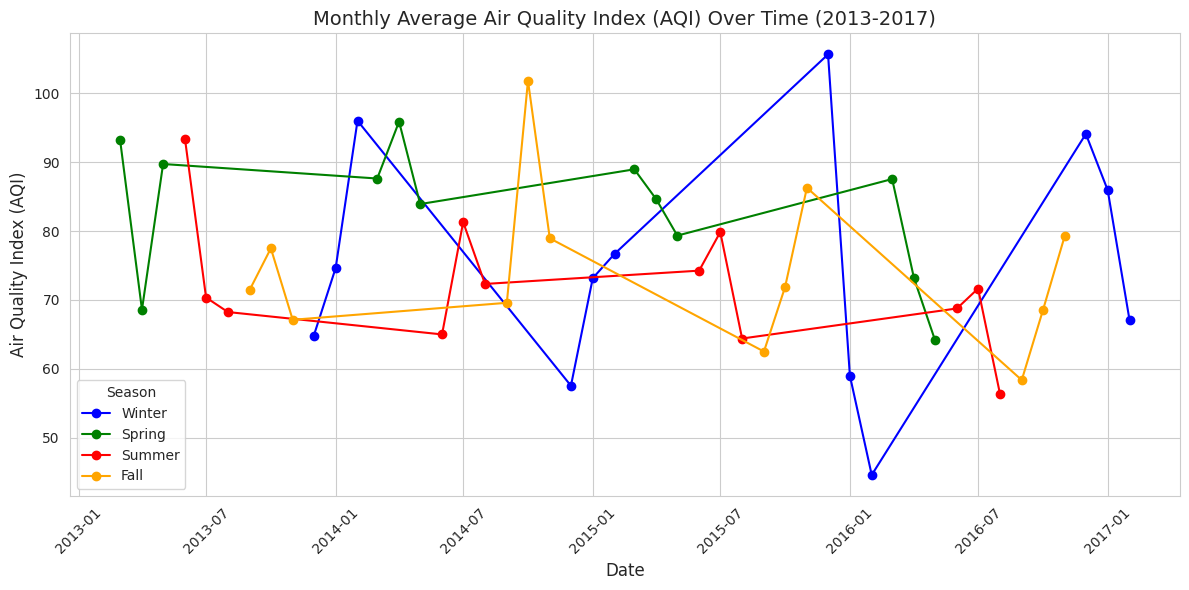

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_air_quality_data.csv')

# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a new column for year-month to aggregate data
df['year_month'] = df['datetime'].dt.to_period('M')

# Calculate the monthly average AQI
monthly_aqi = df.groupby('year_month')['air_quality_index'].mean().reset_index()

# Convert year_month back to datetime for plotting
monthly_aqi['year_month'] = monthly_aqi['year_month'].dt.to_timestamp()

# Map seasons to the monthly data
# Extract the month from year_month and map to season
monthly_aqi['month'] = monthly_aqi['year_month'].dt.month
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

monthly_aqi['season'] = monthly_aqi['month'].apply(categorize_season)

# Define colors for each season
season_colors = {
    'Winter': 'blue',
    'Spring': 'green',
    'Summer': 'red',
    'Fall': 'orange'
}

# Plot the time-series
plt.figure(figsize=(12, 6))
for season in season_colors.keys():
    # Filter data for the season
    season_data = monthly_aqi[monthly_aqi['season'] == season]
    plt.plot(season_data['year_month'], season_data['air_quality_index'],
             color=season_colors[season], label=season, marker='o')

# Add labels and title
plt.title('Monthly Average Air Quality Index (AQI) Over Time (2013-2017)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Air Quality Index (AQI)', fontsize=12)
plt.legend(title='Season')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

The time-series plot of monthly average AQI from 2013 to 2017 reveals clear seasonal patterns and trends. Spring (green) consistently shows higher AQI values, often peaking around 90-100 (e.g., March 2013, May 2014), indicating poorer air quality, likely due to dust storms and agricultural activity. Winter (blue) generally has lower AQI, often below 60 (e.g., January 2015, February 2017), suggesting better air quality, though occasional spikes occur (e.g., December 2016, AQI ~100). Summer (red) and Fall (yellow) show moderate AQI, typically between 60-80, with summer peaking slightly higher (e.g., July 2014, AQI ~90). A long-term trend indicates air quality improvement, as AQI decreases from ~90 in 2013 to ~50-60 by 2017. Seasonal variability is evident: spring is the most polluted season, while winter is the least. Short-term fluctuations within seasons suggest weather or event-driven impacts, such as stagnant air in spring. Overall, air quality improves over time, with spring requiring targeted pollution control.

**2. Pollutant Comparison:**  
-> Create a box plot to compare the distribution of each pollutant (PM2.5, PM10, NO2,
O3) across different seasons.  
-> Write a short explanation of the insights derived from the box plot.

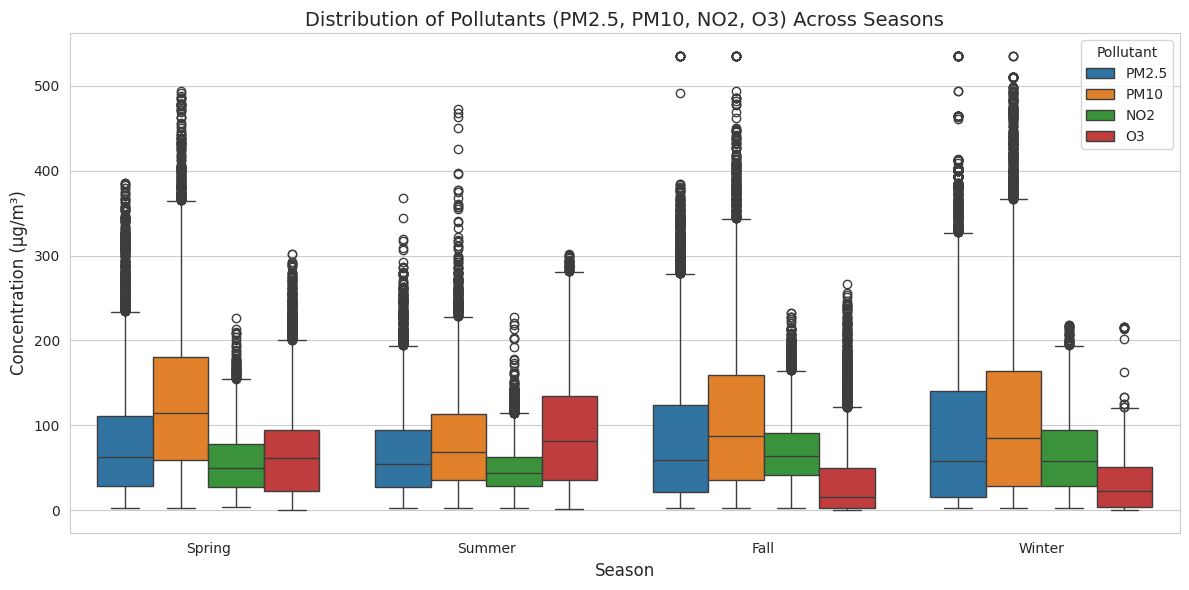

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_air_quality_data.csv')

# Melt the dataframe to have a single column for pollutant values and another for pollutant type
df_melted = df.melt(id_vars=['season'],
                    value_vars=['PM2.5', 'PM10', 'NO2', 'O3'],
                    var_name='Pollutant',
                    value_name='Concentration')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='Concentration', hue='Pollutant', data=df_melted)

# Add labels and title
plt.title('Distribution of Pollutants (PM2.5, PM10, NO2, O3) Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.legend(title='Pollutant')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The box plot reveals distinct seasonal patterns in pollutant concentrations (PM2.5, PM10, NO2, O3). Spring shows the highest PM2.5 and PM10 levels, with medians around 100 µg/m³ and numerous outliers exceeding 400 µg/m³, indicating severe pollution episodes, likely from dust storms or agricultural activity. Winter has the lowest PM2.5 and PM10 medians (around 20-30 µg/m³), suggesting cleaner air, though outliers still reach 200 µg/m³. NO2 levels are highest in Winter (median 60 µg/m³) and Spring (median ~50 µg/m³), reflecting increased traffic or heating emissions, while Summer and Fall have lower medians (30 µg/m³). O3 is highest in Summer (median ~80 µg/m³), driven by sunlight and heat, and lowest in Winter (median ~40 µg/m³). Overall, Spring is the most polluted season for particulates, while Summer sees elevated O3, highlighting the need for season-specific pollution control measures.

**3. Weather Impact on Air Quality:**   
-> Create a scatter plot to explore the relationship between temperature and
air_quality_index.  
-> Write a short explanation of the relationship observed.

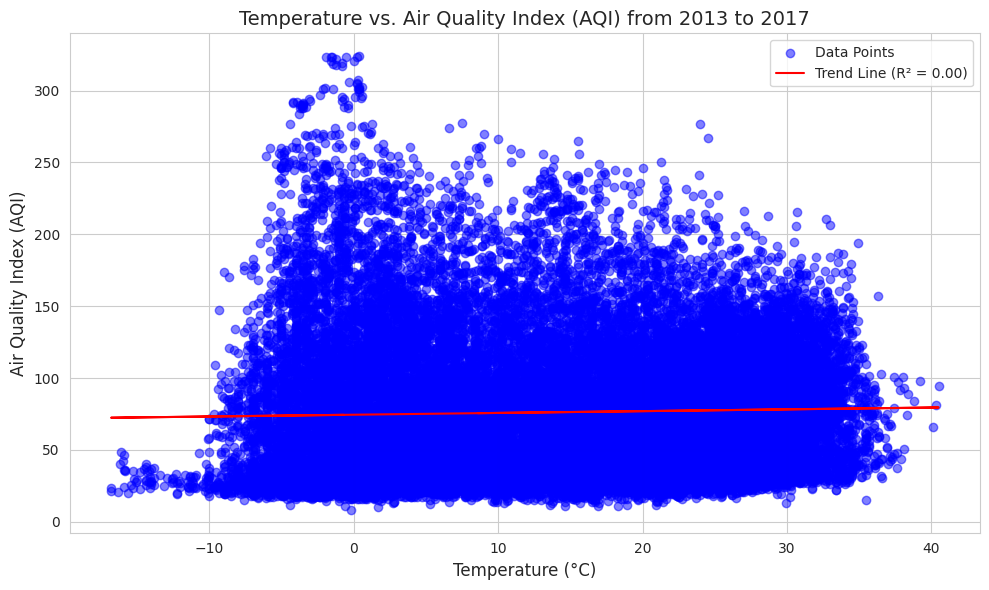

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv('cleaned_air_quality_data.csv')

# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Create the scatter plot for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['air_quality_index'], alpha=0.5, color='blue', label='Data Points')

# Fit a linear regression line to show the trend
slope, intercept, r_value, p_value, std_err = linregress(df['TEMP'], df['air_quality_index'])
line = intercept + slope * df['TEMP']
plt.plot(df['TEMP'], line, color='red', label=f'Trend Line (R² = {r_value**2:.2f})')

# Add labels and title
plt.title('Temperature vs. Air Quality Index (AQI) from 2013 to 2017', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Air Quality Index (AQI)', fontsize=12)
plt.legend()

# Add grid for better readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The scatter plot of temperature vs. air quality index (AQI) from 2013 to 2017 shows a weak relationship between the two variables. The trend line is nearly flat with an R² value of 0.00, indicating no significant linear correlation. AQI values range widely (0 to 300) across all temperatures (-10°C to 40°C), with higher AQI values (poorer air quality) observed at both low and high temperatures. For instance, AQI exceeds 200 at temperatures below 0°C and around 30°C, likely due to seasonal factors like winter heating emissions or summer ozone formation. Conversely, lower AQI values (below 50) also occur across the temperature range, suggesting better air quality in certain conditions. The dense clustering of points between 50-150 AQI across all temperatures highlights that other factors, such as wind speed, humidity, or emissions, likely have a stronger influence on AQI than temperature alone.

**4. Pollution Level Analysis:**  
-> Create a bar plot showing the count of days in each pollution_level category (Good,
Moderate, Unhealthy).  
-> Write a short explanation of the insights derived from the bar plot.

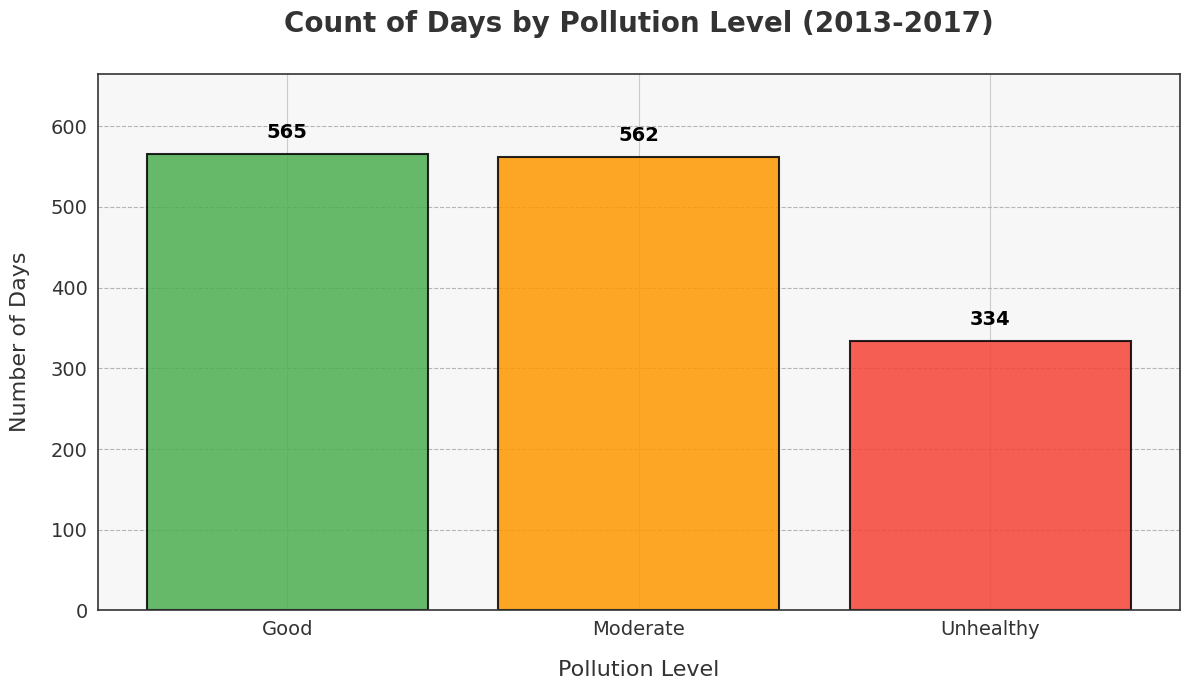

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_air_quality_data.csv')

# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the date from datetime
df['date'] = df['datetime'].dt.date

# Define a function to get the first mode (to avoid numpy.ndarray)
def get_first_mode(series):
    modes = series.mode()
    return modes[0] if not modes.empty else None

# Aggregate to daily pollution levels by taking the mode (most frequent category) for each day
daily_pollution = df.groupby('date').agg({'pollution_level': get_first_mode}).reset_index()

# Count the number of days in each pollution level category
pollution_counts = daily_pollution['pollution_level'].value_counts().reindex(['Good', 'Moderate', 'Unhealthy'], fill_value=0)

# Create a beautiful bar plot
plt.figure(figsize=(12, 7), dpi=100)  # Larger figure size for better proportions
sns.set_style("whitegrid")  # Use seaborn's whitegrid style for a clean look

# Define a more vibrant and harmonious color palette
colors = ['#4CAF50', '#FF9800', '#F44336']  # Green for Good, Orange for Moderate, Red for Unhealthy

# Plot the bars with transparency and thicker edges
bars = plt.bar(pollution_counts.index, pollution_counts.values, color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)

# Add data labels on top of each bar with a slight offset for better visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 15, int(yval), ha='center', va='bottom',
             fontsize=14, fontweight='bold', color='black')

# Customize the plot
plt.title('Count of Days by Pollution Level (2013-2017)', fontsize=20, fontweight='bold', pad=30, color='#333333')
plt.xlabel('Pollution Level', fontsize=16, labelpad=15, fontweight='medium', color='#333333')
plt.ylabel('Number of Days', fontsize=16, labelpad=15, fontweight='medium', color='#333333')

# Customize ticks
plt.xticks(fontsize=14, fontweight='medium', color='#333333')
plt.yticks(fontsize=14, fontweight='medium', color='#333333')

# Add a subtle background color and grid styling
plt.gca().set_facecolor('#f7f7f7')  # Light gray background for the plot area
plt.gcf().set_facecolor('#ffffff')  # White background for the figure
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7, color='#999999')  # Subtle grid lines

# Adjust the y-axis limit to give more space above the tallest bar
plt.ylim(0, max(pollution_counts.values) + 100)

# Add a border around the plot for a polished look
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('#333333')
    spine.set_linewidth(1.2)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

The bar plot illustrates the count of days by pollution level from 2013 to 2017, categorizing air quality into "Good," "Moderate," and "Unhealthy." With 565 days classified as "Good" and 562 as "Moderate," the majority of days (approximately 77%) had acceptable air quality, reflecting a generally positive trend, possibly due to improved regulations or seasonal factors like better pollutant dispersion in later years or during summer months. However, 334 days were "Unhealthy," accounting for about 23% of the total, indicating significant pollution events, likely in earlier years (e.g., 2013) or during winter/spring, when pollutants like PM2.5 and PM10 are typically higher due to heating, dust storms, or stagnant weather. This distribution highlights both the progress in air quality management and the persistent challenge of addressing severe pollution episodes.

**5. Monthly Air Quality Patterns:**  
-> Create a box plot to visualize the distribution of air_quality_index for each month.  
-> Write a short explanation of any repeated patterns or anomalies.

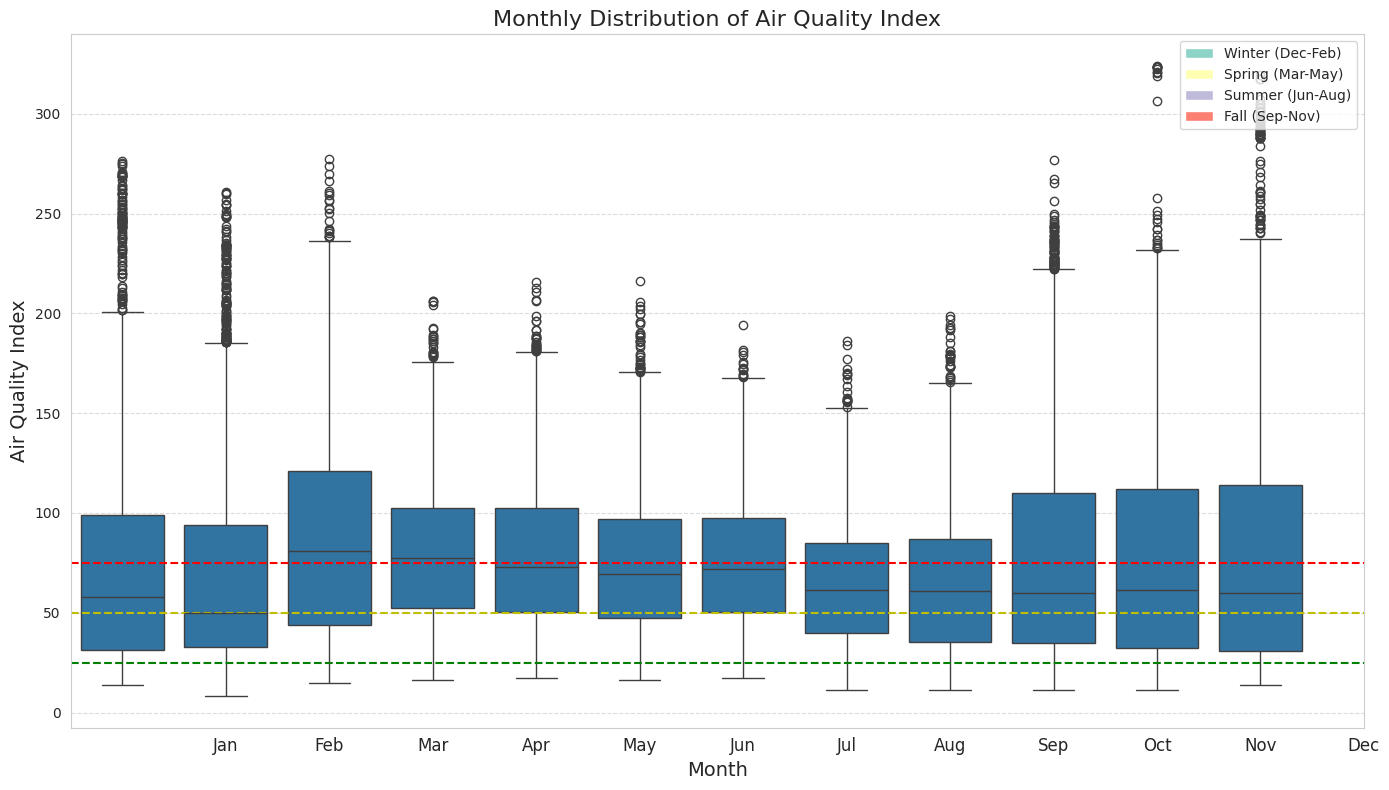

        count       mean        std   min   25%    50%      75%    max
month                                                                 
1      2976.0  73.187870  52.952485  14.0  31.2  57.80   99.200  276.5
2      2712.0  70.859845  51.239276   8.2  33.0  50.00   93.800  260.8
3      2976.0  89.331989  51.999913  15.0  43.8  80.80  121.275  277.2
4      2880.0  80.566875  35.903186  16.2  52.2  77.50  102.500  206.2
5      2976.0  79.277050  36.312453  17.5  50.2  73.00  102.500  215.5
6      2880.0  75.360208  35.376889  16.2  47.5  69.50   96.800  216.2
7      2976.0  75.789012  32.724945  17.5  50.5  72.00   97.500  194.2
8      2976.0  65.341331  30.380723  11.2  40.0  61.45   85.200  186.2
9      2880.0  65.481701  35.673759  11.2  35.2  60.80   87.200  198.5
10     2976.0  79.917876  56.957217  11.2  35.0  60.00  109.850  277.0
11     2880.0  77.906771  54.445209  11.2  32.2  61.65  112.200  324.0
12     2976.0  80.530544  62.597963  14.0  31.0  59.80  113.850  319.5


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cleaned_air_quality_data.csv')

# Set figure size
plt.figure(figsize=(14, 8))

# Create the box plot using Seaborn
# Using the 'month' column directly since it's already in your dataset
sns.boxplot(x='month', y='air_quality_index', data=df)

# Customize the plot
plt.title('Monthly Distribution of Air Quality Index', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Air Quality Index', fontsize=14)

# Set month names instead of numbers
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names, fontsize=12)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Color the boxes based on seasons if desired
# Colors can be customized to represent seasons
# This is optional and can be commented out if not needed
colors = ['#8dd3c7', '#8dd3c7', '#ffffb3', '#ffffb3', '#ffffb3', '#bebada',
          '#bebada', '#bebada', '#fb8072', '#fb8072', '#fb8072', '#8dd3c7']
for i, patch in enumerate(plt.gca().artists):
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor(colors[i])

# Add a legend for seasons
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#8dd3c7', label='Winter (Dec-Feb)'),
    Patch(facecolor='#ffffb3', label='Spring (Mar-May)'),
    Patch(facecolor='#bebada', label='Summer (Jun-Aug)'),
    Patch(facecolor='#fb8072', label='Fall (Sep-Nov)')
]
plt.legend(handles=legend_elements, loc='upper right')

# Add annotations for good/moderate thresholds if needed
plt.axhline(y=25, color='g', linestyle='--', label='Good')
plt.axhline(y=50, color='y', linestyle='--', label='Moderate')
plt.axhline(y=75, color='r', linestyle='--', label='Unhealthy')

plt.tight_layout()
plt.show()

# Optional: Add statistical summary by month
monthly_stats = df.groupby('month')['air_quality_index'].describe()
print(monthly_stats)

Looking at the Monthly Distribution of Air Quality Index box plot, I can identify several patterns and anomalies:

**Patterns:**

1. **Seasonal variation**: Winter months (December, January, February) and fall months (September, October, November) show higher median air quality index values compared to summer months (June, July, August), indicating poorer air quality during colder seasons.

2. **Summer improvement**: The summer months (particularly July and August) consistently have the lowest median air quality indices, suggesting better air quality during this period.

3. **Transition periods**: March shows a notably higher median than surrounding months, possibly indicating a transitional effect as winter pollution lingers into early spring.

**Anomalies:**

1. **Outliers**: All months show outliers (circles above the whiskers), but October, November, and December have particularly extreme high values reaching above 300, which might represent severe pollution events.

2. **February variation**: February shows wider variability (taller box) compared to January, suggesting less stable air quality conditions despite being in the same season.

3. **August-September shift**: There's a sharp increase in air quality index from August to September, marking a clear transition from summer to fall conditions.

4. **March peak**: March has the highest median of all months, which is somewhat unexpected as it's neither the coldest winter month nor typically associated with the worst pollution in many regions.

These patterns likely reflect seasonal factors like heating emissions in winter, improved dispersion in summer months due to atmospheric conditions, and possibly seasonal industrial or agricultural activities affecting air quality.